In [1]:
from data_utils import *
import numpy as np
import progressbar
from fill_missing_values import *

In [19]:
X_train, Y_train = get_X_Y_train()
# X_train = fill_with_num(X_train, 1)

[33 19 60  5 17 18 28 22 53 58]
[0.43386046 0.42249733 0.37764935 0.36932691 0.36509914 0.33425386
 0.31673693 0.29555348 0.29537757 0.2825231 ]


(array([ 5.,  4.,  7., 11., 14., 10., 19.,  8.,  3.,  3.]),
 array([-0.13856067, -0.08131855, -0.02407644,  0.03316567,  0.09040778,
         0.1476499 ,  0.20489201,  0.26213412,  0.31937624,  0.37661835,
         0.43386046]),
 <a list of 10 Patch objects>)

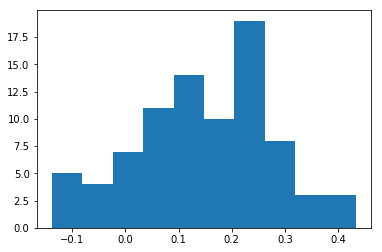

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats.stats import pearsonr   

def inn(X,col):
    res = []
    mask = ~np.isnan(X[:,1,col])
    return mask
        
res = []
for i in range(15,99):
    res1 = []
    mask_i = inn(X_train,i)
    res.append(pearsonr(X_train[mask_i,1,i],Y_train[mask_i,1])[0])
top10 = np.array(res).argsort()[-10:][::-1]
print(top10)
print(np.array(res)[top10])

plt.hist(res)
#     np.histogram(res)
    #plt.matshow(pd.DataFrame(res))

In [3]:
X_train, Y_train, X_validation, Y_validation = random_partition(X_train, Y_train)

In [3]:
def distance(a,b):
    return np.linalg.norm(a-b)

In [4]:
def vectorize(user_X):
    return user_X[1]

In [5]:
def find_top_n_closest_users_indexes(n, X_train, target_user_X):
    target_user_vector = vectorize(target_user_X)
    distances = np.array([distance(vectorize(user), target_user_vector) for user in X_train])
    return distances.argsort()[:n]

In [6]:
def score_R2(y_predicted,y_actual):
    from sklearn.metrics import mean_squared_error
    from math import sqrt
    return sqrt(mean_squared_error(y_actual, y_predicted))

In [8]:
results = {}

In [9]:
N_USERS = 100
top_n = 15

Y_preds = []
for i in progressbar.progressbar(range(N_USERS)):
    target_user_X = X_validation[i]
    
    ten_closest_users_indexes = find_top_n_closest_users_indexes(top_n, X_train, target_user_X)
    Y_preds.append(np.mean(Y_train[ten_closest_users_indexes,1]))

results[top_n] = score_R2(Y_preds,Y_validation[:N_USERS,1])
#     print("USER")
#     print(target_user_X[1,:14])
#     print("SIMILAR USERS")
#     print(X_train[ten_closest_users_indexes][:,1,:14])

#     print(Y_validation[user_number,1])
#     print(np.mean(Y_train[ten_closest_users_indexes,1]))

100% (100 of 100) |######################| Elapsed Time: 0:00:06 Time:  0:00:06


In [10]:
print(results)

{15: 0.910628598521068}


In [51]:
X_train, Y_train = get_X_Y_train()
# X_train = fill_with_num(X_train, 1)
# X_train = fill_with_mean(X_train)

with_33 = inn(X_train,33)
m33 = np.mean(X_train[with_33,1,33])
X_train, Y_train, X_validation, Y_validation = random_partition(X_train, Y_train)

print(np.sum(with_33))

# score_R2(X_validation[with_33,1,33], Y_validation[with_33,1])
score_R2(np.repeat(m33,len(Y_validation)), Y_validation[:,1])


8308


0.9563203989082961

In [19]:
from sklearn.linear_model import LinearRegression

# class NaiveRegresor(object):
#     def __init__(self):
#         self._reg = LinearRegression()

#     def fit(self, X, Y):
#         assert len(X.shape) == 3
#         X = X.reshape(X.shape[0], -1)
#         self._reg = self._reg.fit(X, Y[:, 1])
#         return self

#     def predict(self, X, Y):
#         return self._reg.predict(X.reshape(X.shape[0], -1))

results = []
all_preds = []
all_true = []
for _ in progressbar.progressbar(range(10000)):
    X_train, Y_train = get_X_Y_train()
    X_train = fill_with_num(X_train, 1)
    # X_train = fill_with_mean(X_train)
    X_train, Y_train, X_validation, Y_validation = random_partition_one(X_train, Y_train)

    weights = np.array(range(1,len(X_train)+1), dtype='float')
    weights /= np.sum(weights)

#     Y_preds = []
#     for i in range(len(X_validation)):
    target_user_X = X_validation[0]

    sorted_user_indexes = find_top_n_closest_users_indexes(len(X_train), X_train, target_user_X)
    lr = LinearRegression()
    lr.fit(X_train[sorted_user_indexes,1], Y_train[sorted_user_indexes,1], sample_weight=weights[])
#     Y_preds.append(lr.predict(target_user_X[1].reshape(1,-1)))
    all_preds.append(lr.predict(target_user_X[1].reshape(1,-1))[0])
    all_true.append(Y_validation[0,1])
    if _ % 50 == 0:
        print(score_R2(all_preds, all_true))
#     results.append(score_R2(Y_preds,Y_validation))
    
# print(np.mean(results))
#     print("USER")
#     print(target_user_X[1,:14])
#     print("SIMILAR USERS")
#     print(X_train[ten_closest_users_indexes][:,1,:14])

#     print(Y_validation[user_number,1])
#     print(np.mean(Y_train[ten_closest_users_indexes,1]))

  0% (1 of 10000) |                      | Elapsed Time: 0:00:00 ETA:   2:29:52

1.4545177755061998


  0% (51 of 10000) |                     | Elapsed Time: 0:00:45 ETA:   2:16:55

0.7790061931099609


  1% (101 of 10000) |                    | Elapsed Time: 0:01:28 ETA:   2:22:18

0.7485301215076657


  1% (151 of 10000) |                    | Elapsed Time: 0:02:10 ETA:   2:25:21

0.70950839714878


  2% (201 of 10000) |                    | Elapsed Time: 0:02:54 ETA:   2:22:36

0.7442926534781895


  2% (251 of 10000) |                    | Elapsed Time: 0:03:38 ETA:   2:19:11

0.7562480533848182


  3% (301 of 10000) |                    | Elapsed Time: 0:04:20 ETA:   2:16:13

0.7544744625526614


  3% (351 of 10000) |                    | Elapsed Time: 0:05:03 ETA:   2:14:04

0.7526344640832947


  4% (401 of 10000) |                    | Elapsed Time: 0:05:45 ETA:   2:11:39

0.7671721439823326


  4% (451 of 10000) |                    | Elapsed Time: 0:06:29 ETA:   2:10:50

0.7806272936141841


  5% (501 of 10000) |#                   | Elapsed Time: 0:07:13 ETA:   2:30:29

0.7818415669083439


  5% (551 of 10000) |#                   | Elapsed Time: 0:07:56 ETA:   2:25:08

0.7766376905684671


  5% (591 of 10000) |#                   | Elapsed Time: 0:08:31 ETA:   2:23:12

KeyboardInterrupt: 

In [ ]:
results = np.array(results)

print(np.sum(results < 0.74))
results

In [ ]:
print(np.mean(results))
print(np.sqrt(np.mean([i**2 for i in results])))